# Classifying Movie Reviews On Sentiment

Training Neural Network on IMDB dataset for sentiment analysis

In [268]:
from keras.datasets import imdb
from keras import models
from keras import layers
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## The imdb movie review dataset

Downloading imdb movie review dataset on only top 10000 most frequently occuring words 

In [269]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [270]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


### Format
The provided train_data and test_data is in the format of word indices from a specific word in a dictionary. 

The provided train_label and test_label are lists of 0's and 1's for negative or positive reviews respectively.

### Text Decoding
Lets define a function to decode these vectors of numbers into english words

In [298]:
# i - 3 because the first three indices are reserved for padding, start of sequence, and unknown
def decode(x):
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decode_sentence = ' '.join([reverse_word_index.get(i-3, '') for i in test_data[x]])
    return decode_sentence

In [272]:
decode(0)

" this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert  is an amazing actor and now the same being director  father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for  and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also  to the two little boy's that played the  of norman and paul they were just brilliant children are often left out of the  list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you think the

In [273]:
decode(1)

" big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal  the hair is big lots of boobs  men wear those cut  shirts that show off their  sickening that men actually wore them and the music is just  trash that plays over and over again in almost every scene there is trashy music boobs and  taking away bodies and the gym still doesn't close for  all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## Preparing the dataset

Inorder to feed this dataset into a neural network, we have to preprocess the data into an appropriate and consistent format 

### Encoding the data into one hot encoding of 10000 dimensional vector

In [274]:
def one_hot_encode(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [275]:
x_train = one_hot_encode(train_data)
x_test = one_hot_encode(test_data)

print(x_train.shape)

(25000, 10000)


### Create a validation sets from training data

We will set aside 10000 samples as the validation set

In [276]:
x_val = x_train[:10000]
x_partial_train = x_train[10000:]

y_val = y_train[:10000]
y_partial_train = y_train[10000:]


In [277]:
y_train = np.asarray(train_labels).astype('float64')
y_test = np.asarray(train_labels).astype('float64')

## Model Definition

As a first test, we will use a three layer network with the following:
    - two fully connected intermediate layers with 16 hidden neurons each
    - output layer with sigmoid to make a binary prediction representing good or bad

In [278]:
model2_16 = models.Sequential()
model2_16.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model2_16.add(layers.Dense(16, activation='relu'))
model2_16.add(layers.Dense(1, activation='sigmoid'))

### Hyperparameters

We will test out rmsprop optimizer with the default (0.001) learning rate

Also, the loss function will be binary_crossentropy since we are performing binary sentiment analysis, and we will keep track of the accuracy

In [279]:
model2_16.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Training Model

Running the Model on 20 epochs with batch_size of 512

In [280]:
history = model2_16.fit(x_partial_train, y_partial_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 386us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 3s 189us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 148us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2838 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3147 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 2s 150us/step - loss: 0.0978 - acc: 0.9707 - val_loss: 0.3130 - 

## Analysis

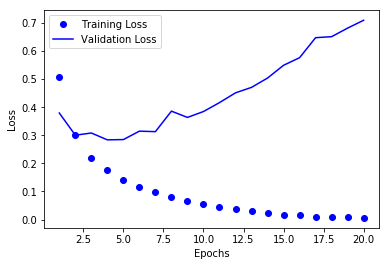

In [281]:
history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


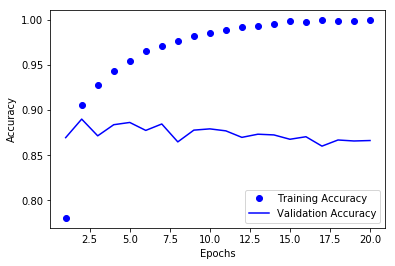

In [282]:
plt.clf()
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, train_acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Summary
It seems like the loss and accuracy of the model was the best around 4 epochs.

After 4 epochs it seemed like the model was starting to overfit to the training data.

Lets rebuild the model to use the entire training set and train it on 4 epochs

## Rebuild the model and evaluate on test set

In [285]:
model_final = models.Sequential()
model_final.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_final.add(layers.Dense(16, activation='relu'))
model_final.add(layers.Dense(1, activation='sigmoid'))
model_final.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [286]:
model_final.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 4s 179us/step - loss: 0.4727 - acc: 0.8218
Epoch 2/4
25000/25000 [==============================] - 3s 106us/step - loss: 0.2666 - acc: 0.9094
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2029 - acc: 0.9288
Epoch 4/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.1712 - acc: 0.9388


In [287]:
results = model_final.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 134us/step


In [288]:
results

[1.9207620817565918, 0.49888]

In [296]:
model_final.predict(x_test)

array([[0.15538289],
       [0.99982613],
       [0.39133856],
       ...,
       [0.08093724],
       [0.04959967],
       [0.4630671 ]], dtype=float32)

It seems fairly certain for the second movie review (99%) to be positive, lets see what the review says

In [299]:
decode(1)

" this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances  the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere  with sexual tension and psychological  it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the  moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual  and desperation be patient  up the atmosphere and pay attention to t